## Importing Libraries

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt 

##  Custom implementation of Linear Regression

In [2]:
class CustomLinearReg:
    # lr stands for 'Learning-Rate'
    def __init__(self,lr=0.1):
        self.lr = lr

    def fit(self,X,y):
        self._X = X
        self._y = y.reshape(-1,1)

        # figuring out value of Coef & Intercept
        # firstly picking them at random
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()

        # gradient descent
        errors = []
        for i in range(50):
            self.gradient_descent()
            errors.append(self.error())
        return errors

    def gradient_descent(self):
        # getting gradient i.e 'delta m' and 'delta c'
        d_coef , d_intercept = self.gradient()
        # updating values of gradient
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr

    def gradient(self):
        # yh is 'y-hypothesis'
        yh = self.predict(self._X)

        d_coef = ((yh-self._y) * self._X).mean()
        d_intercept = (yh-self._y).mean()

        return d_coef , d_intercept

    def predict(self ,X):
        # Equation of line : y = m*x + c
        y_predict = X*self.coef_ + self.intercept_
        return y_predict

    def error(self):
        # error^2 = (y_hypo - y_actual)^2
        return ((self.predict(self._X) - self._y)**2).sum()

## Model Building

In [3]:
from sklearn.datasets import make_regression

bias = 200
X,y,coef = make_regression(n_features=1,bias = bias ,random_state=42,coef=True,noise=10)

In [4]:
model = CustomLinearReg(lr=0.1)
errors = model.fit(X,y)

In [5]:
model.coef_ , model.intercept_

(42.74246307553632, 199.66116100489455)

## Visualization 

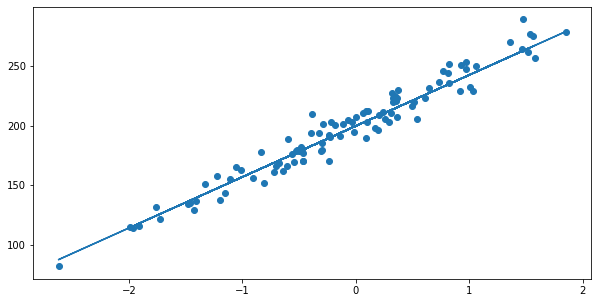

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.plot(X, model.predict(X), label="Custom-LR")
plt.show()

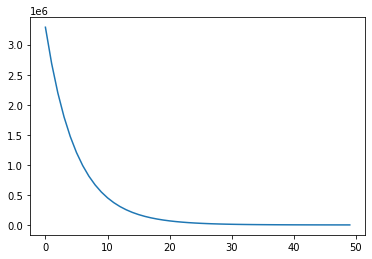

In [7]:
plt.plot(errors)
plt.show()

In [8]:
# for learning rate = 0.1 and after 50 iterations
model.error()

8216.281869938843

## Method to figure out best learning rate

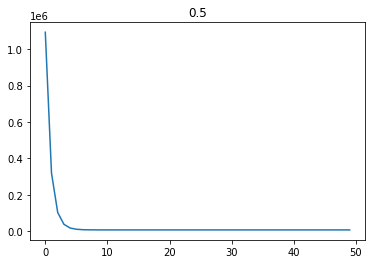

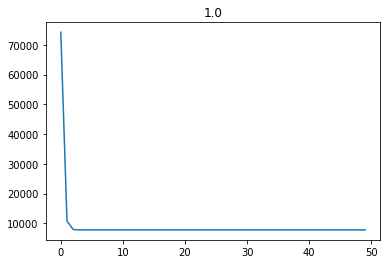

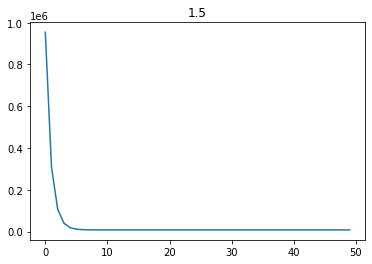

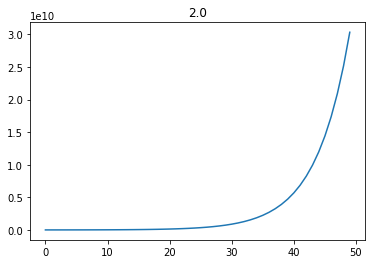

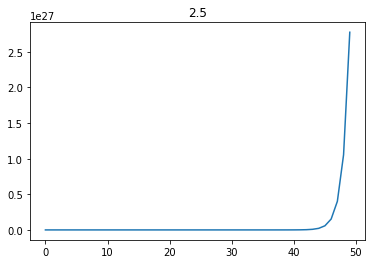

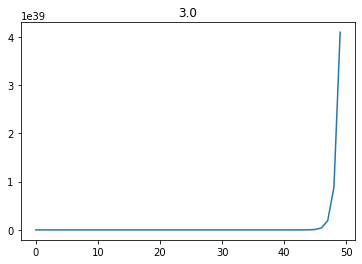

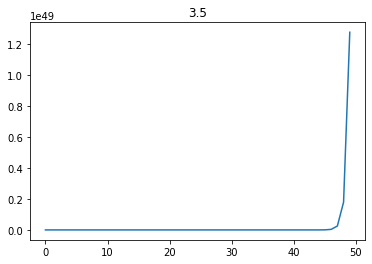

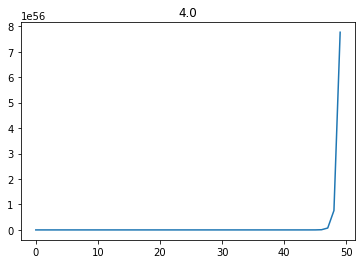

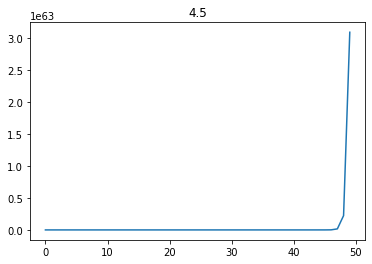

In [9]:
for i in range(1,10):
    model = CustomLinearReg(lr = 0.5* i )
    errors = model.fit(X,y)

    plt.figure()
    plt.title(str(0.5*i))
    plt.plot(errors)